This is the notebook to use the summary dataframe to generate figure 1.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
BASEDIR = '/home/yiheng/analysis/WGS'

In [3]:
# get the summary dataframe
FC1_barcode = os.path.join(BASEDIR, 'run1_barcode.tab')
FC2_barcode = os.path.join(BASEDIR, 'run2_barcode.tab')
FC3_barcode = os.path.join(BASEDIR, 'FAH05432_barcode.tab')
FC4_barcode = os.path.join(BASEDIR, 'FAH05731_barcode.tab')

FC1_hit = os.path.join(BASEDIR, 'run1_hit.tab')
FC2_hit = os.path.join(BASEDIR, 'run2_hit.tab')
FC3_hit = os.path.join(BASEDIR, 'FAH05432_hit.tab')
FC4_hit = os.path.join(BASEDIR, 'FAH05731_hit.tab')

FC1_barcode_df = pd.read_csv(FC1_barcode, sep = '\t')
FC2_barcode_df = pd.read_csv(FC2_barcode, sep = '\t')
FC3_barcode_df = pd.read_csv(FC3_barcode, sep = '\t')
FC4_barcode_df = pd.read_csv(FC4_barcode, sep = '\t')

FC1_hit_df = pd.read_csv(FC1_hit, sep = '\t')
FC2_hit_df = pd.read_csv(FC2_hit, sep = '\t')
FC3_hit_df = pd.read_csv(FC3_hit, sep = '\t')
FC4_hit_df = pd.read_csv(FC4_hit, sep = '\t')


In [4]:
barcode_df = pd.concat([FC1_barcode_df, FC2_barcode_df, FC3_barcode_df, FC4_barcode_df], axis=1).T
hit_df = pd.concat([FC1_hit_df, FC2_hit_df, FC3_hit_df, FC4_hit_df], axis=1).T

In [5]:
hit_df

,0,1,2,3,4
run1,0.909397,0.920917,0.008595,0.070450,1.206434e+09
run2,0.809369,0.832383,0.013932,0.153651,4.426674e+08
FAH05432,0.926960,0.936060,0.007376,0.056528,4.175447e+09
FAH05731,0.914167,0.926304,0.011241,0.062379,5.657718e+08


In [6]:
barcode_df

,0,1,2,3,4,5
run1,0.174088,0.125500,0.243360,0.150137,0.065623,0.241292
run2,0.220647,0.299891,0.149660,0.044295,0.052474,0.233033
FAH05432,0.138522,0.145564,0.082254,0.200379,0.176529,0.256751
FAH05731,0.149387,0.108778,0.083516,0.230810,0.192679,0.234830


In [7]:
hit_df[0]

run1        0.909397
run2        0.809369
FAH05432    0.926960
FAH05731    0.914167
Name: 0, dtype: float64

In [8]:
# from raw value to percentage
barcode01_percentage = [x*100 for x in barcode_df[0]]
barcode02_percentage = [x*100 for x in barcode_df[1]]
barcode03_percentage = [x*100 for x in barcode_df[4]]
barcode04_percentage = [x*100 for x in barcode_df[3]]
barcode05_percentage = [x*100 for x in barcode_df[2]]
unclassified_percentage = [x*100 for x in barcode_df[5]]

wheathit_percentage = [x*100 for x in hit_df[0]]
rghit_percentage = [x*100 for x in hit_df[1]]
nthit_percentage = [x*100 for x in hit_df[2]]
nohit_percentage = [x*100 for x in hit_df[3]]

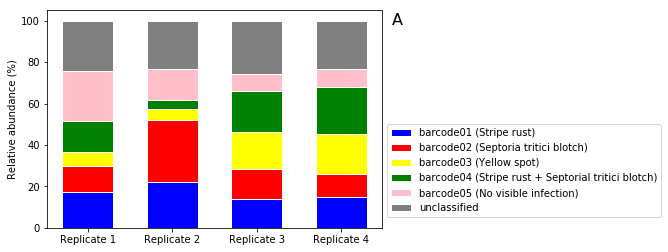

In [9]:
# plot figure 1A
def get_color(x):
    x = x%10
    return ('#%02X%02X%02X' % (int(plt.cm.tab10.colors[x][0]*255),int(plt.cm.tab10.colors[x][1]*255),int(plt.cm.tab10.colors[x][2]*255)))

barWidth = 0.6
r = [0,1,2,3]
plt.bar(r, barcode01_percentage, label = 'barcode01 (Stripe rust)', color='blue', edgecolor='white', width=barWidth)
plt.bar(r, barcode02_percentage, label = 'barcode02 (Septoria tritici blotch)', bottom=barcode01_percentage, color='red', edgecolor='white', width=barWidth)
plt.bar(r, barcode03_percentage, label = 'barcode03 (Yellow spot)', bottom=[i+j for i,j in zip(barcode01_percentage, barcode02_percentage)], color='yellow', edgecolor='white', width=barWidth)
plt.bar(r, barcode04_percentage, label = 'barcode04 (Stripe rust + Septorial tritici blotch)', bottom=[i+j+k for i,j,k in zip(barcode01_percentage, barcode02_percentage, barcode03_percentage)], color='green', edgecolor='white', width=barWidth)
plt.bar(r, barcode05_percentage, label = 'barcode05 (No visible infection)', bottom=[i+j+k+l for i,j,k,l in zip(barcode01_percentage, barcode02_percentage, barcode03_percentage, barcode04_percentage)], color='pink', edgecolor='white', width=barWidth)
plt.bar(r, unclassified_percentage, label = 'unclassified', bottom=[i+j+k+l+m for i,j,k,l,m in zip(barcode01_percentage, barcode02_percentage, barcode03_percentage, barcode04_percentage, barcode05_percentage)], color='grey', edgecolor='white', width=barWidth)

plt.xticks(r, ['Replicate 1', 'Replicate 2', 'Replicate 3', 'Replicate 4'])

plt.ylabel("Relative abundance (%)")
#lt.legend((r[0], r[1], nohit_percentage), ('Reads hit reference genomes', 'Reads hit ncbi nucleotide database', 'Reads have no hit to both reference genomes and ncbi nucleotide database'))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
#plt.title("Read distribution by barcodes", fontsize=14)
plt.text(3.6, 98, 'A', fontsize=16)
plt.savefig('/home/yiheng/analysis/WGS/figures/figure1_barcodes.png', bbox_inches='tight', dpi=1000)
plt.show()

In [10]:
[x-y for x,y in zip(rghit_percentage, wheathit_percentage)]

[1.152067121086148, 2.3013868655427103, 0.9100014945011452, 1.2137320115779744]

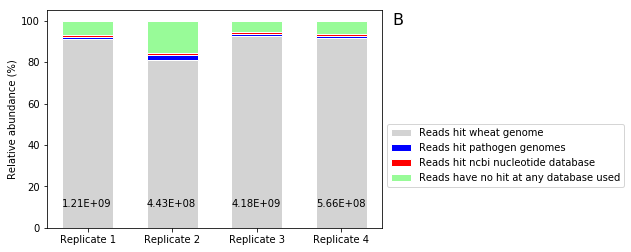

In [13]:
# plot figure 1B
barWidth = 0.6
r = [0,1,2,3]
plt.bar(r, wheathit_percentage, label = 'Reads hit wheat genome', color='#D3D3D3', edgecolor='white', width=barWidth)
plt.bar(r, [x-y for x,y in zip(rghit_percentage, wheathit_percentage)], bottom = wheathit_percentage, label = 'Reads hit pathogen genomes', color= 'blue', edgecolor='white', width=barWidth)
plt.bar(r, nthit_percentage, bottom=rghit_percentage, label = 'Reads hit ncbi nucleotide database', color='red', edgecolor='white', width=barWidth)
plt.bar(r, nohit_percentage, bottom=[i+j for i,j in zip(rghit_percentage, nthit_percentage)], label = 'Reads have no hit at any database used', color='#98FB98', edgecolor='white', width=barWidth)

plt.xticks(r, ['Replicate 1', 'Replicate 2', 'Replicate 3', 'Replicate 4'])
plt.ylabel("Relative abundance (%)")
replicate1_text = '%.2E' % Decimal(hit_df.iloc[0,4])
replicate2_text = '%.2E' % Decimal(hit_df.iloc[1,4])
replicate3_text = '%.2E' % Decimal(hit_df.iloc[2,4])
replicate4_text = '%.2E' % Decimal(hit_df.iloc[3,4])

plt.text(-0.3, 10, replicate1_text)
plt.text(0.7, 10, replicate2_text)
plt.text(1.7, 10, replicate3_text)
plt.text(2.7, 10, replicate4_text)

#lt.legend((r[0], r[1], nohit_percentage), ('Reads hit reference genomes', 'Reads hit ncbi nucleotide database', 'Reads have no hit to both reference genomes and ncbi nucleotide database'))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
#plt.title('Read distribution by hit on databases', fontsize=14)
plt.text(3.6, 98, 'B', fontsize=16)
plt.savefig('/home/yiheng/analysis/WGS/figures/figure1_hits.png', bbox_inches='tight', dpi=1000)
plt.show()

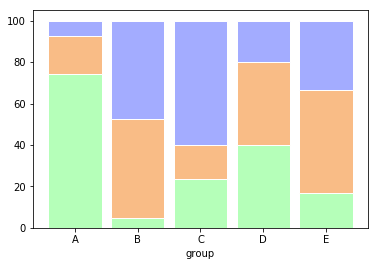

In [25]:
# Example that I followed

r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

# Show graphic
plt.show()